<h1><center>North Carolina Neighborhoods</center></h1><img src="https://www.pngkey.com/png/full/127-1272922_the-state-of-north-carolina-north-carolina-state.png" alt="Drawing" style="width: 300px;"/>
<h1><center>The Battle of the Neighborhoods - IBM Capstone Project</center></h1>

<img src="https://images.fineartamerica.com/images-medium-large-5/busy-charlotte-night-chris-austin.jpg" alt="Drawing" style="width: 1000px;"/>

## 1. Introduction:

<i> Discussion of the business problem and the audience who would be interested in this project.</i>

#### 1.1 Scenario and Background

I am a BI Developer and currently live within walking distance to Downtown Union Station in Denver, Colorado and have an easy commute to work with access to good public transportation. Likewise, I enjoy many amenities in the neighborhood that includes sports bars, restaurants, basketball courts, food and drink shops and entertainment areas. 

I have been thinking of moving to North Carolina but I am a bit stressed towards the process to secure a comparable place to live in Raleigh or Charlotte. Therefore, I decided to apply my learned skills in the IBM Cognitive Class for Data Science to explore ways to make sure my decision can be rewarding. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but I thought digging more into the raw data of the state would be rewarding as it would give me a clear picture of what i might face with decision.

On finding the best spot to live, a great deal of things are viewed as when settling on the choice between urban areas, towns, or neighborhoods. Some of propositions incorporate, but not limited to: 

##### Overall Comparison: 
- The correlation of similar components for every city, bringing about having a general diagram of the two urban areas. A portion of the prevalent components incorporate populace, typical cost for basic items, normal lease, wrongdoing rate, charge rates, and air quality. 

##### Crime Rates: 
- Here, the correlation is made to realize the crimes of two urban communities, at that point estimates them both against the national statistics. 

##### Cost of Living and Salary: 
- Comparison: This considers looking at pay rates and typical cost for basic items in urban areas for a choice to be made.  It mostly takes into consideration test scores and teacher and student ratios, including the teacher's experience of the lists schools in the city of your choice.

##### Neighborhood Comparison: 
- This looks at neighborhood comparison and helps one choose the best place to live within any given city. These sites allow you to see some pretty interesting facts about the various communities.

#### 1.2 Problem and Purpose of this Project

The dataset incorporates the coordinates of the cities and neighborhoods in the USA. The datasets does not include the venues within these locations. With venue information, it would  be easy to find out more information about the neighborhoods. For example, how many sports bars and restaurants there are, and any basketball courts or playgrounds? We could also need to find out about any banks and food and drink shops? It would better comprehend or settle on good choice about where to move or migrate to if this data was accessible.

Subsequently, the reason for this project is to, algorithmically, find a way to use the location coordinates and tag each data point into a neighborhood in **two Counties in North Carolina-Wake County and Mecklenburg County**. The algorithm used is k-means clustering. The main idea is to determine neighborhood with venues clustered around each other so that one can make a decision on the right neighborhood to chose based on the proximity of amenities and venues to each other.

##### A. Clustering the Neighborhoods
The k-means clustering algorithm is an unsupervised clustering technique searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers in the dataset.

The two assumptions above are presumably the basis of the k-means model.

#### 1.3 Interested Audience

Information discovered in this project is useful to any person or entity considering moving to a major around the United States or anywhere in the world, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen.

**NB**: <i>While all of these analyses are useful for comparing the neighborhoods, there is nothing like visiting the actual city, seeing the neighborhoods, and talking to the residents. If it's possible, an in-person visit is highly recommended before making a big move or relocating decision.</i>

## 2. Data:

<i>Description of the data and its sources that will be used to solve the problem</i>

The dataset for this project consists of information regarding the cities in the USA obtained from https://simplemaps.com/data/us-cities. Specifically, the data contain: **City Name, County Code, County Name, Density, Id, Latitude, Longitude, Source, State Id, State Name, and Timezone**. I used business intelligence tools for geocoding the data to obtain the correct coordinates. The data was then exported and converted into a .json, read into a pandas dataframe and sliced into Wake and Meclenburg data for use in the project. 

In addition to this data, the Foursquare API will be used to collect venues near the neighborhoods for cluster analysis to be performed on the data.


In [1]:
import pandas as pd # library for data analsysis
print('Libraries imported.')

Libraries imported.


In [2]:
cities_data = "uscitiescleaned.json"
df = pd.read_json(cities_data, orient='columns')
print('The dataframe has', df.shape, 'rows and columns respectively.')
df.head()

The dataframe has (28889, 13) rows and columns respectively.


,Number of Records,City,County Name,Density,Id,Lat,Lng,Population,Ranking,State Id,State Name,Timezone,Zip
0,1,South Creek,Pierce,125,1840116412,46.9994,-122.3921,2500,3,WA,Washington,America/Los_Angeles,98580
1,1,Roslyn,Kittitas,84,1840097718,47.2507,-121.0989,947,3,WA,Washington,America/Los_Angeles,98941
2,1,Sprague,Lincoln,163,1840096300,47.3048,-117.9713,441,3,WA,Washington,America/Los_Angeles,99032
3,1,Gig Harbor,Pierce,622,1840097082,47.3352,-122.5968,9507,3,WA,Washington,America/Los_Angeles,98332
4,1,Lake Cassidy,Snohomish,131,1840116371,48.0639,-122.0920,3591,3,WA,Washington,America/Los_Angeles,98223


### 3. Methodology:

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 102kB 18.8MB/s ta 0:00:01
Libraries imported.


### Segmenting North Carolina Information

Since the dataframe contains information of the whole of the United States, North Carolina (NC), the State of interest was segmented from the whole and some of the column names renamed.

In [7]:
df.rename(columns={'State Id': 'State', 'County Name':'County', 'County Code':'CountyCode', 'City':'Neighborhood', 'Lat': 'Latitude','Lng': 'Longitude'}, inplace=True)
df.head()

,Number of Records,Neighborhood,County,Density,Id,Latitude,Longitude,Population,Ranking,State,State Name,Timezone,Zip
0,1,South Creek,Pierce,125,1840116412,46.9994,-122.3921,2500,3,WA,Washington,America/Los_Angeles,98580
1,1,Roslyn,Kittitas,84,1840097718,47.2507,-121.0989,947,3,WA,Washington,America/Los_Angeles,98941
2,1,Sprague,Lincoln,163,1840096300,47.3048,-117.9713,441,3,WA,Washington,America/Los_Angeles,99032
3,1,Gig Harbor,Pierce,622,1840097082,47.3352,-122.5968,9507,3,WA,Washington,America/Los_Angeles,98332
4,1,Lake Cassidy,Snohomish,131,1840116371,48.0639,-122.0920,3591,3,WA,Washington,America/Los_Angeles,98223


In [13]:
NC_data = df[df.State == 'NC']
NC_data.head()

,Number of Records,Neighborhood,County,Density,Id,Latitude,Longitude,Population,Ranking,State,State Name,Timezone,Zip
6677,1,Trenton,Jones,484,1840061975,35.0640,-77.3553,285,3,NC,North Carolina,America/New_York,28585
6678,1,Stanfield,Stanly,131,1840064499,35.2336,-80.4303,1517,3,NC,North Carolina,America/New_York,28163
6679,1,Sanford,Lee,389,1840064038,35.4874,-79.1772,34557,3,NC,North Carolina,America/New_York,27330
6680,1,Cofield,Hertford,46,1840061224,36.3567,-76.9105,382,3,NC,North Carolina,America/New_York,27922
6681,1,Thomasville,Davidson,612,1840064227,35.8813,-80.0807,26615,3,NC,North Carolina,America/New_York,27360


Now the NC data is sliced and the based on the needed columns for the project

In [14]:
cols = [1,2,3,5,6,9]
NC_data = NC_data[NC_data.columns[cols]]
NC_data.head().reset_index()

,index,Neighborhood,County,Density,Latitude,Longitude,State
0,6677,Trenton,Jones,484,35.0640,-77.3553,NC
1,6678,Stanfield,Stanly,131,35.2336,-80.4303,NC
2,6679,Sanford,Lee,389,35.4874,-79.1772,NC
3,6680,Cofield,Hertford,46,36.3567,-76.9105,NC
4,6681,Thomasville,Davidson,612,35.8813,-80.0807,NC


In [15]:
NC_data.shape
print('The dataframe has', NC_data.shape, 'rows and columns respectively.')

The dataframe has (736, 6) rows and columns respectively.


### Let's determine the address of one location in North Carolina, USA.

In [16]:
address = '9220 Bothwell Street, Raleigh, NC 27612'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of 9220 Bothwell Street, Raleigh, NC 27612 is {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of 9220 Bothwell Street, Raleigh, NC 27612 is 35.89567655, -78.800617622443.


### Install and import FOLIUM for our purpose

In [17]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [18]:
# create map of NC using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(NC_data['Latitude'], NC_data['Longitude'], NC_data['Neighborhood'], NC_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

In [19]:
#map.save('screenAreGrab.png',format='png')
map.save('map.html')

### Segmenting Wake County

Let's simplify the above map and segment and clusters only the neighborhoods in Wake County. So let's slice the original dataframe and create a new dataframe of the Wake County data.

In [20]:
wake_data = NC_data[NC_data.County == 'Wake']
wake_data.drop(wake_data.index[2], inplace=True)
print('The dataframe has', wake_data.shape, 'rows and columns respectively.')
wake_data.reset_index()

The dataframe has (11, 6) rows and columns respectively.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,6710,Morrisville,Wake,1177,35.8366,-78.8348,NC
1,6722,Knightdale,Wake,892,35.7917,-78.4966,NC
2,6904,Apex,Wake,1020,35.7246,-78.8698,NC
3,6917,Cary,Wake,1118,35.7817,-78.8175,NC
4,6919,Raleigh,Wake,1235,35.8324,-78.6438,NC
5,6929,Garner,Wake,714,35.6938,-78.6199,NC
6,7063,Fuquay-Varina,Wake,781,35.5961,-78.7807,NC
7,7084,Wake Forest,Wake,995,35.9634,-78.5139,NC
8,7108,Zebulon,Wake,436,35.8318,-78.3162,NC
9,7289,Wendell,Wake,530,35.7823,-78.3959,NC


Now let's get the latitude and longitude values of Wake County, NC

In [21]:
address = 'Wake, NC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Wake, NC are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Wake, NC are 35.7979355, -78.6118311.


### Visualizing Wake County Sliced Data

In [25]:
map_wake = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(wake_data['Latitude'], wake_data['Longitude'], wake_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_wake)  
    
map_wake

In [26]:
map.save('map.html')

# Wake County Neighborhood Cluster

Now, the next thing to do is to utilize the Foursquare API to explore the wake county neighborhoods and segment them.

Let's define Foursquare Credentials and Version

In [27]:
CLIENT_ID = '2KVAXFWVI43M2CTVTKLGDTZCBP1HVUFXPQKWCBCBTI2SUA2D' # your Foursquare ID
CLIENT_SECRET = 'TU2GMPYE0XBILNWWODXVZR1UHXDBSL0WFTMYTVNHDSS3NZX2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2KVAXFWVI43M2CTVTKLGDTZCBP1HVUFXPQKWCBCBTI2SUA2D
CLIENT_SECRET:TU2GMPYE0XBILNWWODXVZR1UHXDBSL0WFTMYTVNHDSS3NZX2


Let's explore the first neighborhood in the Wake County dataframe

In [28]:
wake_data.loc[6919,'Neighborhood']
print('The first neighborhood is', wake_data.loc[6919,'Neighborhood'])

The first neighborhood is Raleigh


### Now we get the first neighborhood's latitude and longitude values.

In [29]:
neighborhood_latitude = wake_data.loc[6919, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = wake_data.loc[6919, 'Longitude'] # neighborhood longitude value

neighborhood_name = wake_data.loc[6919, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Raleigh are 35.8324, -78.6438.


### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [30]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2KVAXFWVI43M2CTVTKLGDTZCBP1HVUFXPQKWCBCBTI2SUA2D&client_secret=TU2GMPYE0XBILNWWODXVZR1UHXDBSL0WFTMYTVNHDSS3NZX2&v=20180605&ll=35.8324,-78.6438&radius=500&limit=100'

### The GET request is then sent and and the results examined

In [31]:
results = requests.get(url).json()

##### We use the get_category_type function to get the category types.

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now json is cleaned and the and structured into a pandas dataframe.

In [33]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,bartaco North Hills,Taco Place,35.836575,-78.643819
1,Mura Japanese Restaurant,Sushi Restaurant,35.836640,-78.643369
2,Target,Big Box Store,35.836292,-78.642610
3,Renaissance Raleigh North Hills Hotel,Hotel,35.836195,-78.643695
4,Mia Francesca Trattoria,Italian Restaurant,35.836218,-78.643951
5,Starbucks,Coffee Shop,35.836133,-78.642261
6,Natural Body Spa & Shop,Spa,35.836444,-78.643495
7,Anthropologie,Women's Store,35.836825,-78.643161
8,Regal Cinemas North Hills 14,Movie Theater,35.836608,-78.642118
9,Fitness Connection - North Hills,Gym,35.836327,-78.643142


In [34]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


## Wake County Neighborhood Exploration

Let's create a function to collect the venues to all the neighborhoods in Wake County

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now let's write the code to run the above function on each neighborhood and create a new dataframe called Wake County_venues

In [36]:
wake_venues = getNearbyVenues(names=wake_data['Neighborhood'],
                                   latitudes=wake_data['Latitude'],
                                   longitudes=wake_data['Longitude']
                                  )

Morrisville
Knightdale
Apex
Cary
Raleigh
Garner
Fuquay-Varina
Wake Forest
Zebulon
Wendell
Holly Springs


In [37]:
print('There are', wake_venues.shape, 'rows and columns of venues and neighborhoods in Wake County.')

wake_venues.head(10)

There are (81, 7) rows and columns of venues and neighborhoods in Wake County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Morrisville,35.8366,-78.8348,Cedar Fork Community Center,35.837397,-78.839706,Basketball Court
1,Morrisville,35.8366,-78.8348,Triangle Mini Mart,35.839855,-78.831110,Convenience Store
2,Knightdale,35.7917,-78.4966,Mingo Creek Park,35.790788,-78.494254,Park
3,Apex,35.7246,-78.8698,STMM Basketball Gym,35.725050,-78.874514,Basketball Court
4,Apex,35.7246,-78.8698,AT&T,35.723800,-78.874710,Mobile Phone Shop
5,Apex,35.7246,-78.8698,The Creek,35.727985,-78.872740,Scenic Lookout
6,Apex,35.7246,-78.8698,Prince Farms,35.720968,-78.867303,Farm
7,Cary,35.7817,-78.8175,Ibm of Highland Oaks,35.784714,-78.816842,Electronics Store
8,Cary,35.7817,-78.8175,Bond Park Field 1,35.781055,-78.821230,Baseball Field
9,Cary,35.7817,-78.8175,Bond Park Field #2,35.780251,-78.821377,Baseball Field


Text(0, 0.5, 'Venue Count')

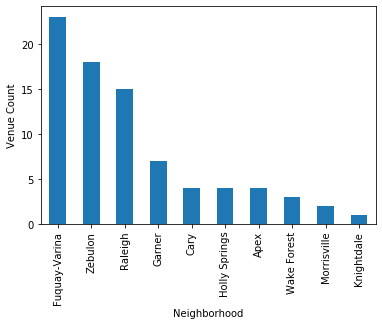

In [41]:
plot1=wake_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Check how many venues were returned for each neighborhood

In [42]:
venue_counts = wake_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Apex,4,4,4,4,4,4
Cary,4,4,4,4,4,4
Fuquay-Varina,23,23,23,23,23,23
Garner,7,7,7,7,7,7
Holly Springs,4,4,4,4,4,4
Knightdale,1,1,1,1,1,1
Morrisville,2,2,2,2,2,2
Raleigh,15,15,15,15,15,15
Wake Forest,3,3,3,3,3,3


Let's find out how many unique categories can be curated from all the returned venues

In [43]:
print('There are {} uniques categories.'.format(len(wake_venues['Venue Category'].unique())))

There are 53 uniques categories.


### Analyze Each Neighborhood in Wake County. NC

In [44]:
# one hot encoding
wake_onehot = pd.get_dummies(wake_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
wake_onehot['Neighborhood'] = wake_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [wake_onehot.columns[-1]] + list(wake_onehot.columns[:-1])
wake_onehot = wake_onehot[fixed_columns]

wake_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Baseball Field,Basketball Court,Beer Store,Big Box Store,Chinese Restaurant,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Discount Store,Donut Shop,Electronics Store,Farm,Fast Food Restaurant,Furniture / Home Store,Gas Station,Gift Shop,Gym,Home Service,Hotel,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Mobile Phone Shop,Movie Theater,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Pool,Sandwich Place,Scenic Lookout,Shoe Store,Smoothie Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Video Store,Women's Store,Yoga Studio
0,Morrisville,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Morrisville,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Knightdale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Apex,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Apex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
wake_onehot.shape
print('The dataframe has', wake_onehot.shape, 'rows and columns respectively.')

The dataframe has (81, 54) rows and columns respectively.


Let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [46]:
wake_grouped = wake_onehot.groupby('Neighborhood').mean().reset_index()
wake_grouped

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Baseball Field,Basketball Court,Beer Store,Big Box Store,Chinese Restaurant,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Discount Store,Donut Shop,Electronics Store,Farm,Fast Food Restaurant,Furniture / Home Store,Gas Station,Gift Shop,Gym,Home Service,Hotel,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Mobile Phone Shop,Movie Theater,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Pool,Sandwich Place,Scenic Lookout,Shoe Store,Smoothie Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Video Store,Women's Store,Yoga Studio
0,Apex,0.000000,0.000000,0.000000,0.0,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cary,0.000000,0.000000,0.000000,0.5,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fuquay-Varina,0.043478,0.043478,0.000000,0.0,0.00,0.00,0.000000,0.043478,0.000000,0.043478,0.0,0.043478,0.000000,0.000000,0.043478,0.043478,0.00,0.00,0.043478,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.043478,0.000000,0.086957,0.043478,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.043478,0.00,0.043478,0.00,0.043478,0.000000,0.000000,0.00,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000
3,Garner,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.142857,0.000000,0.0,0.142857,0.142857,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
4,Holly Springs,0.000000,0.000000,0.000000,0.0,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Knightdale,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Morrisville,0.000000,0.000000,0.000000,0.0,0.50,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Raleigh,0.066667,0.000000,0.000000,0.0,0.00,0.00,0.066667,0.000000,0.066667,0.000000,0.0,0.000000,0.0

Print each neighborhood along with the top 5 most common venues

In [47]:
num_top_venues = 5

for hood in wake_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = wake_grouped[wake_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apex----
                 venue  freq
0     Basketball Court  0.25
1                 Farm  0.25
2       Scenic Lookout  0.25
3    Mobile Phone Shop  0.25
4  American Restaurant  0.00


----Cary----
                 venue  freq
0       Baseball Field  0.50
1                 Pool  0.25
2    Electronics Store  0.25
3  American Restaurant  0.00
4        Smoothie Shop  0.00


----Fuquay-Varina----
                 venue  freq
0   Mexican Restaurant  0.09
1  American Restaurant  0.04
2    Mobile Phone Shop  0.04
3            Gift Shop  0.04
4          Gas Station  0.04


----Garner----
            venue  freq
0            Park  0.29
1     Yoga Studio  0.14
2     Coffee Shop  0.14
3  Cosmetics Shop  0.14
4    Dance Studio  0.14


----Holly Springs----
                 venue  freq
0           Beer Store  0.25
1             Pharmacy  0.25
2          Pizza Place  0.25
3  Sporting Goods Shop  0.25
4  American Restaurant  0.00


----Knightdale----
                 venue  freq
0                

#### Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = wake_grouped['Neighborhood']

for ind in np.arange(wake_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wake_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apex,Scenic Lookout,Mobile Phone Shop,Basketball Court,Farm,Yoga Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant
1,Cary,Baseball Field,Electronics Store,Pool,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store
2,Fuquay-Varina,Mexican Restaurant,American Restaurant,Sandwich Place,Gift Shop,Donut Shop,Indian Restaurant,Discount Store,Mobile Phone Shop,Paper / Office Supplies Store,Cosmetics Shop
3,Garner,Park,Yoga Studio,Sports Bar,Dance Studio,Coffee Shop,Cosmetics Shop,Beer Store,Donut Shop,Gym,Gift Shop
4,Holly Springs,Beer Store,Sporting Goods Shop,Pharmacy,Pizza Place,Yoga Studio,Department Store,Gym,Gift Shop,Gas Station,Furniture / Home Store
5,Knightdale,Park,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant,Farm
6,Morrisville,Basketball Court,Convenience Store,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant
7,Raleigh,Italian Restaurant,Smoothie Shop,Big Box Store,Coffee Shop,Furniture / Home Store,Gym,Hotel,Women's Store,Mobile Phone Shop,Movie Theater
8,Wake Forest,Italian Restaurant,Supermarket,Pharmacy,Dance Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant,Farm
9,Zebulon,Fast Food Restaurant,Pizza Place,Department Store,Sandwich Place,Steakhouse,Optical Shop,Pharmacy,Chinese Restaurant,Home Service,BBQ Joint


In [58]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (10, 11) rows and columns respectively.


### Clustering the Neighborhoods in Wake County.

##### k-means to cluster the neighborhood into 4 clusters.

In [59]:
wake_merged = wake_data

# set number of clusters
kclusters = 4

wake_grouped_clustering = wake_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wake_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 0, 0, 0, 1, 2, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [60]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apex,Scenic Lookout,Mobile Phone Shop,Basketball Court,Farm,Yoga Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant
1,Cary,Baseball Field,Electronics Store,Pool,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store
2,Fuquay-Varina,Mexican Restaurant,American Restaurant,Sandwich Place,Gift Shop,Donut Shop,Indian Restaurant,Discount Store,Mobile Phone Shop,Paper / Office Supplies Store,Cosmetics Shop
3,Garner,Park,Yoga Studio,Sports Bar,Dance Studio,Coffee Shop,Cosmetics Shop,Beer Store,Donut Shop,Gym,Gift Shop
4,Holly Springs,Beer Store,Sporting Goods Shop,Pharmacy,Pizza Place,Yoga Studio,Department Store,Gym,Gift Shop,Gas Station,Furniture / Home Store


In [61]:
# add clustering labels

neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

wake_merged = wake_data

wake_merged = wake_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

wake_merged.head(10)

,Neighborhood,County,Density,Latitude,Longitude,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6710,Morrisville,Wake,1177,35.8366,-78.8348,NC,2.0,Basketball Court,Convenience Store,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant
6722,Knightdale,Wake,892,35.7917,-78.4966,NC,1.0,Park,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant,Farm
6904,Apex,Wake,1020,35.7246,-78.8698,NC,0.0,Scenic Lookout,Mobile Phone Shop,Basketball Court,Farm,Yoga Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant
6917,Cary,Wake,1118,35.7817,-78.8175,NC,3.0,Baseball Field,Electronics Store,Pool,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store
6919,Raleigh,Wake,1235,35.8324,-78.6438,NC,0.0,Italian Restaurant,Smoothie Shop,Big Box Store,Coffee Shop,Furniture / Home Store,Gym,Hotel,Women's Store,Mobile Phone Shop,Movie Theater
6929,Garner,Wake,714,35.6938,-78.6199,NC,0.0,Park,Yoga Studio,Sports Bar,Dance Studio,Coffee Shop,Cosmetics Shop,Beer Store,Donut Shop,Gym,Gift Shop
7063,Fuquay-Varina,Wake,781,35.5961,-78.7807,NC,0.0,Mexican Restaurant,American Restaurant,Sandwich Place,Gift Shop,Donut Shop,Indian Restaurant,Discount Store,Mobile Phone Shop,Paper / Office Supplies Store,Cosmetics Shop
7084,Wake Forest,Wake,995,35.9634,-78.5139,NC,0.0,Italian Restaurant,Supermarket,Pharmacy,Dance Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant,Farm
7108,Zebulon,Wake,436,35.8318,-78.3162,NC,0.0,Fast Food Restaurant,Pizza Place,Department Store,Sandwich Place,Steakhouse,Optical Shop,Pharmacy,Chinese Restaurant,Home Service,BBQ Joint
7289,Wendell,Wake,530,35.7823,-78.3959,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#wake_merged['Cluster Labels'] = wake_merged['Cluster Labels'].astype(int)
#wake_merged

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wake_merged['Latitude'], wake_merged['Longitude'], wake_merged['Neighborhood'], wake_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
from folium.plugins import FloatImage
image_file = 'http://printad.us/wp-content/uploads/2018/07/wake-county-zip-code-map-maps-wake-county-north-carolina-map-a-history-of-zip-code-wake-for-557-x-575-pixels.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

In [66]:
map.save('map.html')

<Figure size 720x720 with 0 Axes>

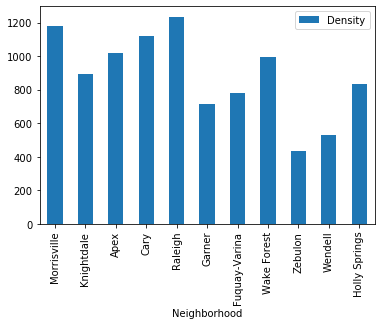

In [67]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#wake_merged.hist(column='Density')
wake_merged.plot(kind='bar',x='Neighborhood',y='Density')#, color=rainbow[cluster])
plt.show()

## Let's Examine The Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1 - American Restaurant

In [68]:

wake_merged.loc[wake_merged['Cluster Labels'] == 0.0, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6904,Wake,NC,0.0,Scenic Lookout,Mobile Phone Shop,Basketball Court,Farm,Yoga Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant
6919,Wake,NC,0.0,Italian Restaurant,Smoothie Shop,Big Box Store,Coffee Shop,Furniture / Home Store,Gym,Hotel,Women's Store,Mobile Phone Shop,Movie Theater
6929,Wake,NC,0.0,Park,Yoga Studio,Sports Bar,Dance Studio,Coffee Shop,Cosmetics Shop,Beer Store,Donut Shop,Gym,Gift Shop
7063,Wake,NC,0.0,Mexican Restaurant,American Restaurant,Sandwich Place,Gift Shop,Donut Shop,Indian Restaurant,Discount Store,Mobile Phone Shop,Paper / Office Supplies Store,Cosmetics Shop
7084,Wake,NC,0.0,Italian Restaurant,Supermarket,Pharmacy,Dance Studio,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant,Farm
7108,Wake,NC,0.0,Fast Food Restaurant,Pizza Place,Department Store,Sandwich Place,Steakhouse,Optical Shop,Pharmacy,Chinese Restaurant,Home Service,BBQ Joint
7395,Wake,NC,0.0,Beer Store,Sporting Goods Shop,Pharmacy,Pizza Place,Yoga Studio,Department Store,Gym,Gift Shop,Gas Station,Furniture / Home Store


#### Cluster 2 - Park

In [69]:
wake_merged.loc[wake_merged['Cluster Labels'] == 1, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6722,Wake,NC,1.0,Park,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant,Farm


#### Cluster 3 - Basketball Court

In [70]:
wake_merged.loc[wake_merged['Cluster Labels'] == 2, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6710,Wake,NC,2.0,Basketball Court,Convenience Store,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store,Fast Food Restaurant


#### Cluster 4 - Baseball Field

In [71]:
wake_merged.loc[wake_merged['Cluster Labels'] == 3, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6917,Wake,NC,3.0,Baseball Field,Electronics Store,Pool,Yoga Studio,Department Store,Home Service,Gym,Gift Shop,Gas Station,Furniture / Home Store


## **Segmenting Mecklenburg County, NC.**

Slice the original dataframe and create a new dataframe of the Mecklenburg County data.

In [72]:
mecklenburg_data = NC_data[NC_data.County == 'Mecklenburg']
#mecklenburg_data.drop(mecklenburg_data.index[2], inplace=True)
print('The dataframe has', mecklenburg_data.shape, 'rows and columns respectively.')
mecklenburg_data.reset_index()

The dataframe has (7, 6) rows and columns respectively.


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,6697,Pineville,Mecklenburg,508,35.0864,-80.8915,NC
1,6749,Davidson,Mecklenburg,846,35.4862,-80.8271,NC
2,6769,Huntersville,Mecklenburg,535,35.4057,-80.8729,NC
3,6902,Cornelius,Mecklenburg,951,35.4731,-80.8822,NC
4,7114,Matthews,Mecklenburg,724,35.1195,-80.7101,NC
5,7152,Charlotte,Mecklenburg,1081,35.2079,-80.8304,NC
6,7309,Mint Hill,Mecklenburg,426,35.1781,-80.6532,NC


In [73]:
address = 'Mecklenburg, NC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mecklenburg, NC are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Mecklenburg, NC are 35.2356385, -80.8139485.


In [74]:
map_mecklenburg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(mecklenburg_data['Latitude'], mecklenburg_data['Longitude'], mecklenburg_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mecklenburg)  
    
map_mecklenburg

#### Let's get the first neighborhood in Mecklenburg County

In [75]:

print('The first neighborhood in Mecklenburg County is', mecklenburg_data.loc[6697, 'Neighborhood'])

The first neighborhood in Mecklenburg County is Pineville


In [76]:
neighborhood_latitude = mecklenburg_data.loc[6697, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = mecklenburg_data.loc[6697, 'Longitude'] # neighborhood longitude value

neighborhood_name = mecklenburg_data.loc[6697, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Pineville are 35.0864, -80.8915.


In [77]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2KVAXFWVI43M2CTVTKLGDTZCBP1HVUFXPQKWCBCBTI2SUA2D&client_secret=TU2GMPYE0XBILNWWODXVZR1UHXDBSL0WFTMYTVNHDSS3NZX2&v=20180605&ll=35.0864,-80.8915&radius=500&limit=100'

In [78]:
#results = requests.get(url).json()

In [79]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [81]:
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,bartaco North Hills,Taco Place,35.836575,-78.643819
1,Mura Japanese Restaurant,Sushi Restaurant,35.836640,-78.643369
2,Target,Big Box Store,35.836292,-78.642610
3,Renaissance Raleigh North Hills Hotel,Hotel,35.836195,-78.643695
4,Mia Francesca Trattoria,Italian Restaurant,35.836218,-78.643951
5,Starbucks,Coffee Shop,35.836133,-78.642261
6,Natural Body Spa & Shop,Spa,35.836444,-78.643495
7,Anthropologie,Women's Store,35.836825,-78.643161
8,Regal Cinemas North Hills 14,Movie Theater,35.836608,-78.642118
9,Fitness Connection - North Hills,Gym,35.836327,-78.643142


In [82]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
mecklenburg_venues = getNearbyVenues(names=mecklenburg_data['Neighborhood'],
                                   latitudes=mecklenburg_data['Latitude'],
                                   longitudes=mecklenburg_data['Longitude']
                                  )

Pineville
Davidson
Huntersville
Cornelius
Matthews
Charlotte
Mint Hill


In [85]:
print('There are', mecklenburg_venues.shape, 'rows and columns of venues and neighborhoods in Wake County.')

mecklenburg_venues.head(10)

There are (58, 7) rows and columns of venues and neighborhoods in Wake County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pineville,35.0864,-80.8915,Pintville Craft Beer,35.085629,-80.891111,Beer Garden
1,Pineville,35.0864,-80.8915,Kit's Trackside Crafts,35.085960,-80.891085,Beer Bar
2,Pineville,35.0864,-80.8915,OooWee BBQ,35.084593,-80.890404,Food Truck
3,Pineville,35.0864,-80.8915,Zafran Kabab Palace,35.087350,-80.886476,Indian Restaurant
4,Pineville,35.0864,-80.8915,The Dive-N Diner,35.085959,-80.887051,Diner
5,Pineville,35.0864,-80.8915,Rite Aid,35.085890,-80.886333,Pharmacy
6,Pineville,35.0864,-80.8915,retro reboot,35.085282,-80.890522,Toy / Game Store
7,Pineville,35.0864,-80.8915,Shell,35.084880,-80.886362,Gas Station
8,Pineville,35.0864,-80.8915,Grower's Outlet,35.088002,-80.887929,Garden Center
9,Pineville,35.0864,-80.8915,Delicias Colombianas,35.087483,-80.886384,Latin American Restaurant


Text(0, 0.5, 'Venue Count')

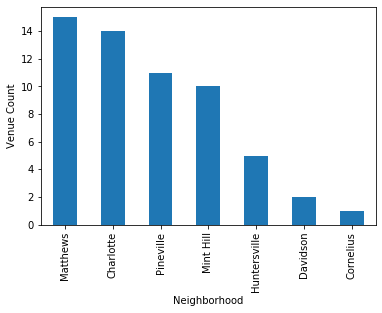

In [86]:
plot1=mecklenburg_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

In [87]:
venue_counts = mecklenburg_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlotte,14,14,14,14,14,14
Cornelius,1,1,1,1,1,1
Davidson,2,2,2,2,2,2
Huntersville,5,5,5,5,5,5
Matthews,15,15,15,15,15,15
Mint Hill,10,10,10,10,10,10
Pineville,11,11,11,11,11,11


In [88]:
# one hot encoding
meck_onehot = pd.get_dummies(mecklenburg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
meck_onehot['Neighborhood'] = mecklenburg_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [meck_onehot.columns[-1]] + list(meck_onehot.columns[:-1])
meck_onehot = meck_onehot[fixed_columns]

meck_onehot.head()

,Neighborhood,American Restaurant,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Breakfast Spot,Brewery,Camera Store,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Diner,Donut Shop,Dry Cleaner,Fondue Restaurant,Food Truck,Furniture / Home Store,Garden Center,Gas Station,Gym,Ice Cream Shop,Indian Restaurant,Kids Store,Latin American Restaurant,Mobile Phone Shop,Museum,Optical Shop,Park,Pharmacy,Pizza Place,Pool,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Shipping Store,Shoe Store,Spa,Theater,Theme Park Ride / Attraction,Toy / Game Store,Video Store,Wine Shop,Women's Store
0,Pineville,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pineville,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pineville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pineville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pineville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
meck_grouped = meck_onehot.groupby('Neighborhood').mean().reset_index()
meck_grouped

,Neighborhood,American Restaurant,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Breakfast Spot,Brewery,Camera Store,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Diner,Donut Shop,Dry Cleaner,Fondue Restaurant,Food Truck,Furniture / Home Store,Garden Center,Gas Station,Gym,Ice Cream Shop,Indian Restaurant,Kids Store,Latin American Restaurant,Mobile Phone Shop,Museum,Optical Shop,Park,Pharmacy,Pizza Place,Pool,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Shipping Store,Shoe Store,Spa,Theater,Theme Park Ride / Attraction,Toy / Game Store,Video Store,Wine Shop,Women's Store
0,Charlotte,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.0,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,0.0,0.000000,0.000000,0.000000,0.071429,0.071429,0.0,0.000000,0.071429,0.0,0.0,0.071429,0.000000,0.071429,0.0,0.071429,0.0,0.0,0.0,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.0,0.071429
1,Cornelius,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
2,Davidson,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Huntersville,0.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.0,0.2,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Matthews,0.066667,0.000000,0.0,0.066667,0.066667,0.000000,0.000000,0.066667,0.066667,0.0,0.000000,0.0,0.066667,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.2,0.000000,0.000000,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.066667,0.000000,0.066667,0.000000,0.066667,0.0,0.000000
5,Mint Hill,0.000000,0.100000,0.1,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.0,0.000000,0.000000,0.100000,0.0,0.000000,0.1,0.1,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Pineville,0.000000,0.000000,0.0,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.0,0.090909,0.090909,0.000000,0.000000,0.090909,0.0,0.090909,0.000000,0.0,0.0,0.000000,0.090909,0.000000,0.0,0.000000,0.0,0.0,0.0,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.000000


In [90]:
num_top_venues = 5

for hood in meck_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = meck_grouped[meck_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlotte----
            venue  freq
0          Bakery  0.14
1  Ice Cream Shop  0.07
2      Donut Shop  0.07
3         Theater  0.07
4             Spa  0.07


----Cornelius----
                                      venue  freq
0                                 Wine Shop   1.0
1                       American Restaurant   0.0
2  Residential Building (Apartment / Condo)   0.0
3                                Kids Store   0.0
4                 Latin American Restaurant   0.0


----Davidson----
                        venue  freq
0  Construction & Landscaping   0.5
1              Cosmetics Shop   0.5
2           Indian Restaurant   0.0
3   Latin American Restaurant   0.0
4           Mobile Phone Shop   0.0


----Huntersville----
                 venue  freq
0  American Restaurant   0.2
1              Brewery   0.2
2         Optical Shop   0.2
3                 Pool   0.2
4           Kids Store   0.2


----Matthews----
                    venue  freq
0  Furniture / Home Store  0.20
1  

In [91]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [92]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = meck_grouped['Neighborhood']

for ind in np.arange(meck_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(meck_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlotte,Bakery,Women's Store,Residential Building (Apartment / Condo),Donut Shop,Ice Cream Shop,Indian Restaurant,Mobile Phone Shop,Camera Store,Park,Pizza Place
1,Cornelius,Wine Shop,Women's Store,Coffee Shop,Garden Center,Furniture / Home Store,Food Truck,Fondue Restaurant,Dry Cleaner,Donut Shop,Diner
2,Davidson,Cosmetics Shop,Construction & Landscaping,Women's Store,Coffee Shop,Garden Center,Furniture / Home Store,Food Truck,Fondue Restaurant,Dry Cleaner,Donut Shop
3,Huntersville,American Restaurant,Brewery,Kids Store,Optical Shop,Pool,Basketball Court,Cosmetics Shop,Food Truck,Fondue Restaurant,Bakery
4,Matthews,Furniture / Home Store,Gym,Baseball Field,Basketball Court,Big Box Store,Breakfast Spot,Construction & Landscaping,Cosmetics Shop,Dry Cleaner,American Restaurant
5,Mint Hill,Gym,Coffee Shop,Bakery,Bar,Beer Bar,Shipping Store,Sandwich Place,Restaurant,Pizza Place,Museum
6,Pineville,Garden Center,Gas Station,Toy / Game Store,Indian Restaurant,Shoe Store,Beer Bar,Beer Garden,Latin American Restaurant,Diner,Food Truck
